In [1]:
import numpy as np

In [13]:
### 定义模型主体部分
### 包括线性回归公式、均方损失和参数偏导三部分
def linear_loss(X, y, w, b):
    num_train = X.shape[0]

    y_hat = np.dot(X, w) + b
    loss = np.sum((y - y_hat) ** 2) / num_train

    dw = np.dot(X.T, (y_hat - y)) / num_train
    db = np.sum((y_hat - y)) / num_train

    return y_hat, loss, dw, db
    

In [3]:
def init_parameters(dims):
    w = np.zeros((dims, 1))
    b = 0
    return w, b

In [9]:
def linear_train(X, y, lr=0.01, epoches=10000):
    loss_his = []
    w, b = init_parameters(X.shape[1])
    for i in range(epoches):
        y_hat, loss, dw, db = linear_loss(X, y, w, b)

        w += -lr * dw
        b += -lr * db
        loss_his.append(loss)
        # 每1000次迭代打印当前损失信息
        if i % 1000 == 0:
            print('epoch %d loss %f' % (i, loss))

         # 将当前迭代步优化后的参数保存到字典
        params = {
            'w': w,
            'b': b
        }
        # 将当前迭代步的梯度保存到字典
        grads = {
            'dw': dw,
            'db': db
        }     

    return loss_his, params, grads



In [5]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
data = diabetes.data
target = diabetes.target 
print(data.shape)
print(target.shape)
print(data[:5])
print(target[:5])

(442, 10)
(442,)
[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]]
[151.  75. 141. 206. 135.]


In [7]:
# 导入sklearn diabetes数据接口
from sklearn.datasets import load_diabetes
# 导入sklearn打乱数据函数
from sklearn.utils import shuffle
# 获取diabetes数据集
diabetes = load_diabetes()
# 获取输入和标签
data, target = diabetes.data, diabetes.target 
# 打乱数据集
X, y = shuffle(data, target, random_state=13)
# 按照8/2划分训练集和测试集
offset = int(X.shape[0] * 0.8)
# 训练集
X_train, y_train = X[:offset], y[:offset]
# 测试集
X_test, y_test = X[offset:], y[offset:]
# 将训练集改为列向量的形式
y_train = y_train.reshape((-1,1))
# 将验证集改为列向量的形式
y_test = y_test.reshape((-1,1))
# 打印训练集和测试集维度
print("X_train's shape: ", X_train.shape)
print("X_test's shape: ", X_test.shape)
print("y_train's shape: ", y_train.shape)
print("y_test's shape: ", y_test.shape)

X_train's shape:  (353, 10)
X_test's shape:  (89, 10)
y_train's shape:  (353, 1)
y_test's shape:  (89, 1)


In [15]:
loss_his, params, grads = linear_train(X_train, y_train, 0.01, 200000)
print(params)

epoch 0 loss 28045.572238
epoch 1000 loss 5208.840650
epoch 2000 loss 4913.011192
epoch 3000 loss 4662.297544
epoch 4000 loss 4449.260266
epoch 5000 loss 4267.715592
epoch 6000 loss 4112.521979
epoch 7000 loss 3979.403042
epoch 8000 loss 3864.800655
epoch 9000 loss 3765.753062
epoch 10000 loss 3679.793734
epoch 11000 loss 3604.867455
epoch 12000 loss 3539.260672
epoch 13000 loss 3481.543709
epoch 14000 loss 3430.522796
epoch 15000 loss 3385.200263
epoch 16000 loss 3344.741490
epoch 17000 loss 3308.447478
epoch 18000 loss 3275.732074
epoch 19000 loss 3246.103056
epoch 20000 loss 3219.146433
epoch 21000 loss 3194.513397
epoch 22000 loss 3171.909490
epoch 23000 loss 3151.085597
epoch 24000 loss 3131.830465
epoch 25000 loss 3113.964485
epoch 26000 loss 3097.334513
epoch 27000 loss 3081.809574
epoch 28000 loss 3067.277276
epoch 29000 loss 3053.640833
epoch 30000 loss 3040.816582
epoch 31000 loss 3028.731912
epoch 32000 loss 3017.323541
epoch 33000 loss 3006.536077
epoch 34000 loss 2996.3208

In [16]:
def predict(X, params):
    y_pred = np.dot(X, params['w']) + params['b']
    return y_pred

y_pred = predict(X_test, params)

In [17]:
### 定义R2系数函数
def r2_score(y_test, y_pred):
    '''
    输入：
    y_test：测试集标签值
    y_pred：测试集预测值
    输出：
    r2：R2系数
    '''
    # 测试标签均值
    y_avg = np.mean(y_test)
    # 总离差平方和
    ss_tot = np.sum((y_test - y_avg)**2)
    # 残差平方和
    ss_res = np.sum((y_test - y_pred)**2)
    # R2计算
    r2 = 1 - (ss_res/ss_tot)
    return r2

r2_score(y_test, y_pred)

0.5334204628881214

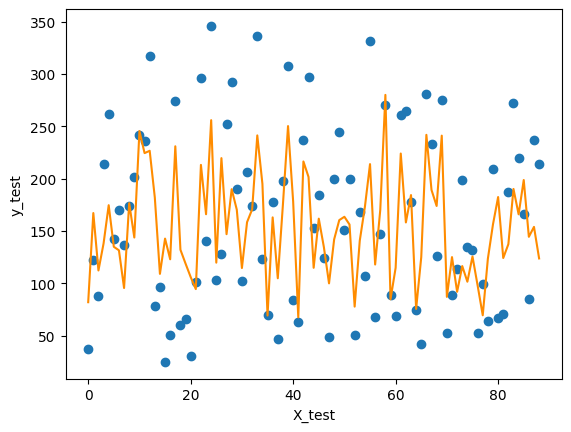

In [18]:
import matplotlib.pyplot as plt
f = X_test.dot(params['w']) + params['b']

plt.scatter(range(X_test.shape[0]), y_test)
plt.plot(f, color = 'darkorange')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.show();

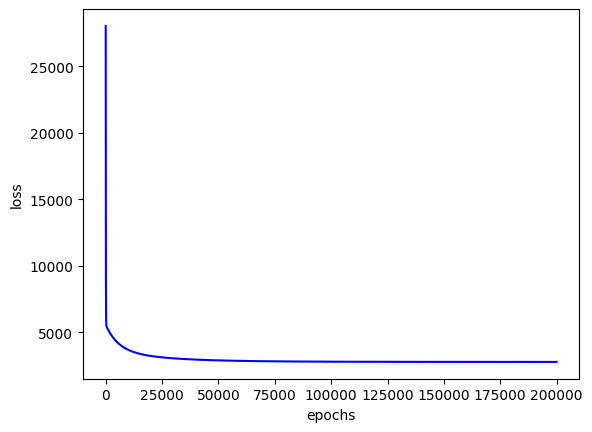

In [19]:
plt.plot(loss_his, color='blue')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [20]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.5392099922850235

In [21]:
mean_squared_error(y_test, y_pred)

3371.8700029390257